# 14. Max Voting, Averaging & Weighted Average Voting (Classification)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [17]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=1000, noise = 0.2)  # putting noise=0.2 to gget more noise.(0.05 was giving pretty good data)

In [18]:
df = {'x1':x[:,0], 'x2':x[:,1], 'y':y}

In [19]:
dataset = pd.DataFrame(df)

<Axes: xlabel='x1', ylabel='x2'>

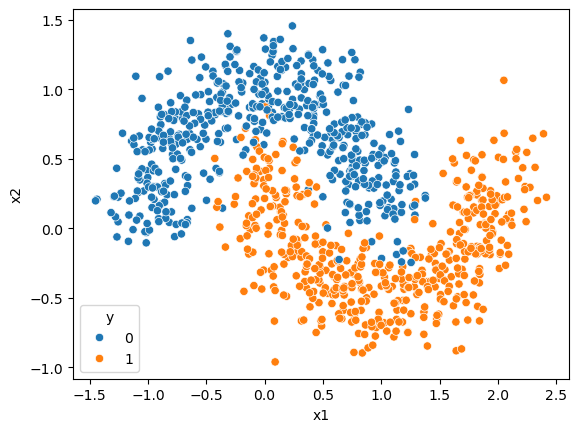

In [20]:
sns.scatterplot(x='x1',y='x2', data=dataset, hue='y')

In [22]:
x_a = dataset.iloc[:,:-1]
y_a = dataset['y']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_a,y_a, test_size=0.2, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [26]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train, y_train), dt.score(x_test, y_test)  # it comes overfitting model

(1.0, 0.96)

In [28]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train, y_train), sv.score(x_test, y_test)  # gives good accuracy

(0.97375, 0.96)

In [29]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train, y_train), gnb.score(x_test, y_test)

(0.86625, 0.875)

### But to get even better accuracy than these: 
# Using Voting Classifier: ->

In [30]:
from sklearn.ensemble import VotingClassifier

In [34]:
li = [('dt1',DecisionTreeClassifier()),('sv1',SVC()), ('gnb1', GaussianNB())]

In [41]:
vc = VotingClassifier(li, weights=[10,4,7])   # for putting different weights it isn't showing any difference. Butusually it does
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[10, 4, 7])

In [42]:
vc.score(x_train, y_train), vc.score(x_test, y_test)

(0.98125, 0.96)